<a href="https://colab.research.google.com/github/Khalil-Salama/Chicago-crime-data/blob/main/Chicago_crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
###mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)


In [18]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [19]:
import shutil
# Assuming the uploaded file name is Chicago_Crime_2001-2022.zip
# If you uploaded a different file name, please change it here.
source_path = "Chicago_Crime_2001-2022.zip"
destination_path = "/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/Chicago crime data/" + os.path.basename(source_path)

try:
    shutil.copy(source_path, destination_path)
    print(f"Successfully copied {source_path} to {destination_path}")
except FileNotFoundError:
    print(f"Error: Source file not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Source file not found at Chicago_Crime_2001-2022.zip


In [20]:
import zipfile

# Path to the zip file in your Google Drive
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/Chicago crime data/Chicago_Crime_2001-2022.zip"

# Directory to extract the contents to (within the Colab environment)
extracted_path = "/content/extracted_data"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zf:
        zf.extractall(extracted_path)
    print(f"Successfully extracted data to {extracted_path}")
except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_file_path}")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Successfully extracted data to /content/extracted_data


In [21]:
extracted_path = "/content/extracted_data/Data" # Assuming the data is in a 'Data' subfolder

# List files in the extracted directory
extracted_files = os.listdir(extracted_path)
print("Files extracted:")
for file in extracted_files:
    print(file)

# List to hold DataFrames from each CSV
dataframes = []

# Iterate through extracted files and load all CSVs
for file in extracted_files:
    if file.endswith('.csv'):
        csv_file_path = os.path.join(extracted_path, file)
        try:
            # Load the CSV into a pandas DataFrame
            df_single = pd.read_csv(csv_file_path)
            dataframes.append(df_single)
            print(f"Successfully loaded {os.path.basename(csv_file_path)}.")
        except Exception as e:
            print(f"Error loading the CSV file {os.path.basename(csv_file_path)}: {e}")

# Concatenate all DataFrames into a single one
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
    print(f"\nSuccessfully combined {len(dataframes)} CSV files into a single DataFrame.")
    display(df.head()) # Display the first few rows of the combined DataFrame
    display(df.info()) # Display info about the combined DataFrame
else:
    print("\nNo CSV files found in the extracted data to combine.")

Files extracted:
Chicago-Crime_2003.csv
Chicago-Crime_2001.csv
Chicago-Crime_2015.csv
README.txt
Chicago-Crime_2012.csv
Chicago-Crime_2010.csv
Chicago-Crime_2020.csv
Chicago-Crime_2019.csv
Chicago-Crime_2022.csv
Chicago-Crime_2014.csv
Chicago-Crime_2002.csv
Chicago-Crime_2017.csv
Chicago-Crime_2013.csv
Chicago-Crime_2007.csv
Chicago-Crime_2005.csv
Chicago-Crime_2004.csv
Chicago-Crime_2011.csv
Chicago-Crime_2009.csv
Chicago-Crime_2008.csv
Chicago-Crime_2018.csv
Chicago-Crime_2016.csv
Chicago-Crime_2021.csv
Chicago-Crime_2006.csv
Successfully loaded Chicago-Crime_2003.csv.
Successfully loaded Chicago-Crime_2001.csv.
Successfully loaded Chicago-Crime_2015.csv.
Successfully loaded Chicago-Crime_2012.csv.
Successfully loaded Chicago-Crime_2010.csv.
Successfully loaded Chicago-Crime_2020.csv.
Successfully loaded Chicago-Crime_2019.csv.
Successfully loaded Chicago-Crime_2022.csv.
Successfully loaded Chicago-Crime_2014.csv.
Successfully loaded Chicago-Crime_2002.csv.
Successfully loaded Chicag

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2523392,01/01/2003 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1732,17.0,30.0,41.941927,-87.719929
1,2530494,01/01/2003 01:00:00 AM,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1933,19.0,32.0,41.929290,-87.654144
2,3116714,01/01/2003 01:00:00 PM,OTHER OFFENSE,ANIMAL FIGHTING,STREET,False,False,915,9.0,16.0,41.795304,-87.674341
3,2526097,01/01/2003 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,True,False,912,9.0,12.0,41.813264,-87.690686
4,2582131,01/01/2003 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1522,15.0,29.0,41.878367,-87.763074


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


None

## Examining the data and seting date_time and index

In [22]:
#Let's examine 1 value from our Crime Date Time column.
test_date = df.loc[0, 'Date']
test_date

'01/01/2003 01:00:00 AM'

In [23]:
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2003-01-01 01:00:00')

In [24]:
#Preparing the Date Time Index
#Let's convert this to a Pandas datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
###make our datetime index
df = df.set_index('Date')
df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2003-01-01 01:00:00,2523392,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1732,17.0,30.0,41.941927,-87.719929
2003-01-01 01:00:00,2530494,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1933,19.0,32.0,41.929290,-87.654144
2003-01-01 13:00:00,3116714,OTHER OFFENSE,ANIMAL FIGHTING,STREET,False,False,915,9.0,16.0,41.795304,-87.674341


## Adding holidays to the data set

In [92]:
!pip install holidays

In [93]:
import holidays
import datetime as dt
from holidays import country_holidays

In [96]:
## making a date range that covers full dataset
all_days = pd.date_range(df.index.min(), df.index.max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

## Inspecting the Data Format

### Sorting index to see the earliest and most recent timestamp.

In [27]:
df = df.sort_index()
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [28]:
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,5926227,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2233,22.0,34.0,41.687651,-87.632719
2001-01-01,3994567,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,SIDEWALK,False,False,211,2.0,4.0,41.831067,-87.617463
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782


check crimes count each year

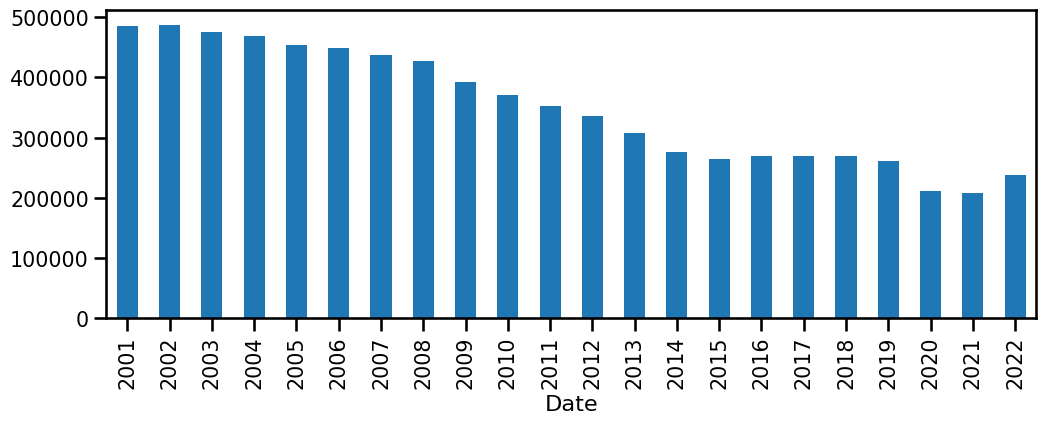

In [29]:
### Let's get a quick visualization of how many crimes we have for each year.
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');

Cheking crime types

In [30]:
###primery type value counts
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


<Axes: ylabel='Primary Type'>

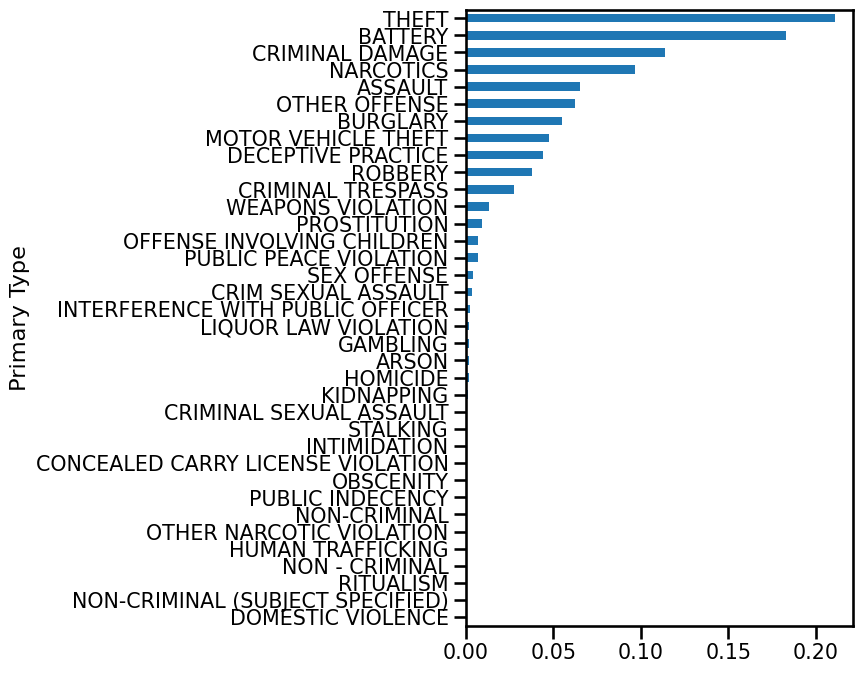

In [32]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

In [34]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
Primary Type,
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958


## Using Dictionaries and Loops for **Primary type** to Prepare for Time Series

In [35]:
df.groupby("Primary Type").size().head()

,0
Primary Type,
ARSON,13121
ASSAULT,501103
BATTERY,1410889
BURGLARY,422246
CONCEALED CARRY LICENSE VIOLATION,1019


### One crime loop on daily basis

In [36]:
## making our dictionary
CRIMES = {}

In [37]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime

'ROBBERY'

In [39]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Primary Type']==crime]
temp.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:20:00,1311046,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2311,19.0,NaN,41.965917,-87.657969
2001-01-01 00:38:40,1311667,ROBBERY,STRONGARM - NO WEAPON,ALLEY,False,False,1924,19.0,NaN,41.940027,-87.653501
2001-01-01 01:09:29,1310522,ROBBERY,ARMED: HANDGUN,STREET,True,False,434,4.0,NaN,41.703375,-87.560674


In [40]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res

,0
Date,
2001-01-01,41
2001-01-02,35
2001-01-03,51
2001-01-04,55
2001-01-05,55
...,...
2022-12-27,27
2022-12-28,28
2022-12-29,28


In [41]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['ROBBERY'])

In [42]:
CRIMES['ROBBERY']

,0
Date,
2001-01-01,41
2001-01-02,35
2001-01-03,51
2001-01-04,55
2001-01-05,55
...,...
2022-12-27,27
2022-12-28,28
2022-12-29,28


### Making the loop for all crime types on daily bases

In [44]:
# 1. get list of  unique crime descriptions
crime_list = df['Primary Type'].unique()
crime_list

array(['THEFT', 'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'SEX OFFENSE', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT',
       'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BATTERY',
       'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [46]:
# 2. Create an empty dictionary
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts)
    # and keep ONLY the .size()
   temp_res = temp.resample("D").size()
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['THEFT', 'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [48]:
##♥5verify the values for one type. We will check values for shootings:
CRIMES['SEX OFFENSE']

,0
Date,
2001-01-01,65
2001-01-02,4
2001-01-03,5
2001-01-04,1
2001-01-05,2
...,...
2022-12-27,2
2022-12-28,0
2022-12-29,3


In [49]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,THEFT,CRIM SEXUAL ASSAULT,OFFENSE INVOLVING CHILDREN,SEX OFFENSE,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,ASSAULT,DECEPTIVE PRACTICE,OTHER OFFENSE,BATTERY,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,412,38.0,100,65,233,3,70,94,167,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,221,2.0,4,4,118,0,66,78,101,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,226,7.0,3,5,136,0,79,49,96,165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,243,2.0,5,1,133,0,57,42,96,173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,265,6.0,9,2,142,0,68,53,90,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,147,NaN,4,2,64,4,47,40,33,76,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,112,NaN,3,0,78,4,44,38,38,102,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,137,NaN,3,3,95,1,38,38,37,97,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# Re-Engineering Raw Crime Data

In [54]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

1) Dropping uneeded columns

In [55]:
## Drop extra columns not needed
drop_cols = ['District',	'Ward',	'Latitude',	'Longitude']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 00:00:00 to 2022-12-31 23:55:00
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Primary Type          object
 2   Description           object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
 6   Beat                  int64 
 7   count                 int64 
dtypes: bool(2), int64(3), object(3)
memory usage: 426.6+ MB


2) separate out the date (without time) as its own column

In [57]:
## saving just the date (no time) as a column
df['Only_Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,count,Date,Only_Date
Date,,,,,,,,,,
2001-01-01,5926227,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2233,1,2001-01-01,2001-01-01
2001-01-01,3994567,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,SIDEWALK,False,False,211,1,2001-01-01,2001-01-01
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,1,2001-01-01,2001-01-01


## 1) Year

In [58]:
## Engineering Features using components of the date/time
df['Year']  = df.index.year

/tmp/ipython-input-247088404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year',palette='dark');


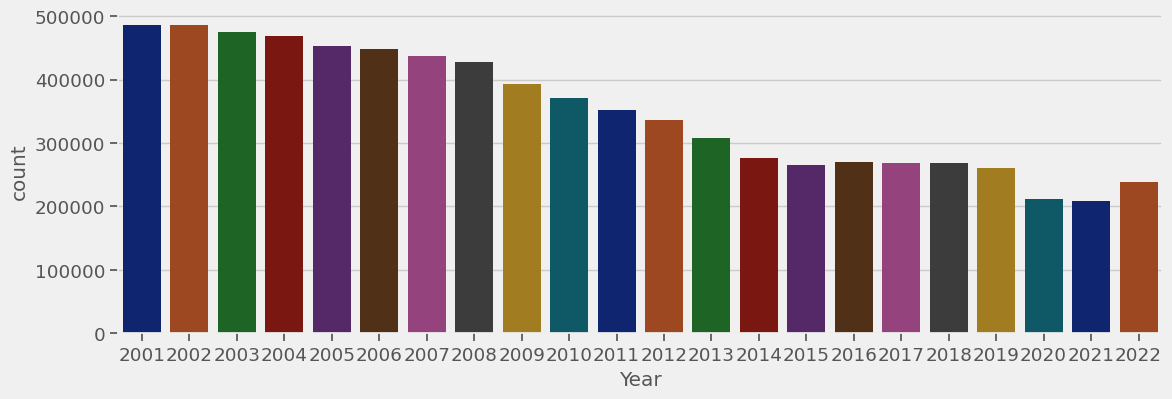

In [59]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

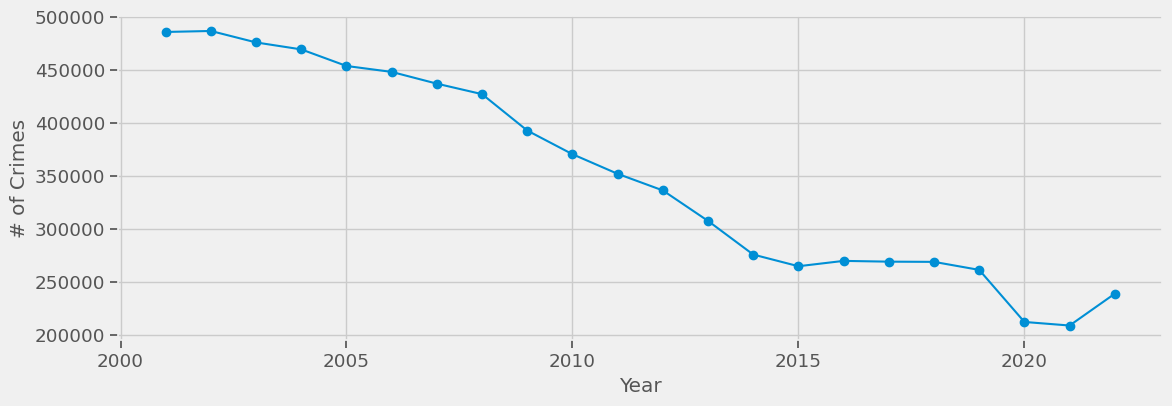

In [60]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

## 2) Month

In [61]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,count,Date,Only_Date,Year,Month,MonthName
Date,,,,,,,,,,,,,
2001-01-01,5926227,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2233,1,2001-01-01,2001-01-01,2001,1,January
2001-01-01,3994567,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,SIDEWALK,False,False,211,1,2001-01-01,2001-01-01,2001,1,January
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,1,2001-01-01,2001-01-01,2001,1,January


create a dictionary to match the number of the month with the name. This will allow us to keep our months in order by number

In [62]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

/tmp/ipython-input-1369714036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
/tmp/ipython-input-1369714036.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


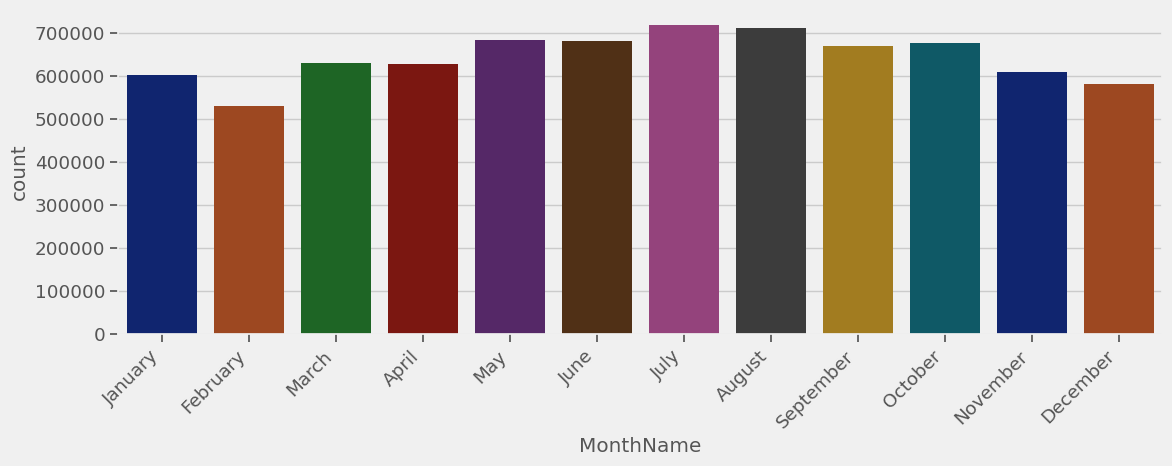

In [63]:
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

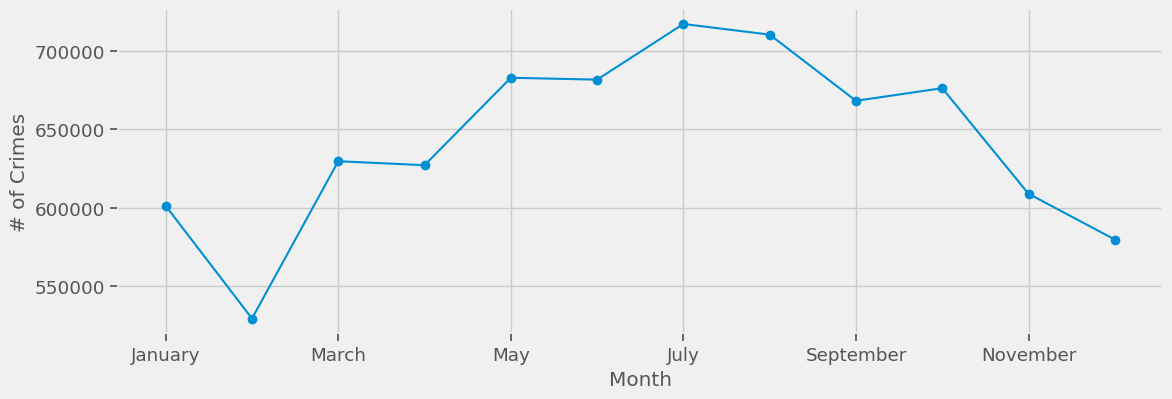

In [64]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]

ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

## 3) Day of the week

In [65]:
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,count,Date,Only_Date,Year,Month,MonthName,DayOfWeek,DayNum
Date,,,,,,,,,,,,,,,
2001-01-01,5926227,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2233,1,2001-01-01,2001-01-01,2001,1,January,Monday,0
2001-01-01,3994567,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,SIDEWALK,False,False,211,1,2001-01-01,2001-01-01,2001,1,January,Monday,0
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,1,2001-01-01,2001-01-01,2001,1,January,Monday,0


In [66]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

/tmp/ipython-input-4279422870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='DayNum',palette='dark')
/tmp/ipython-input-4279422870.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([v for k,v in day_lookup.items()]);


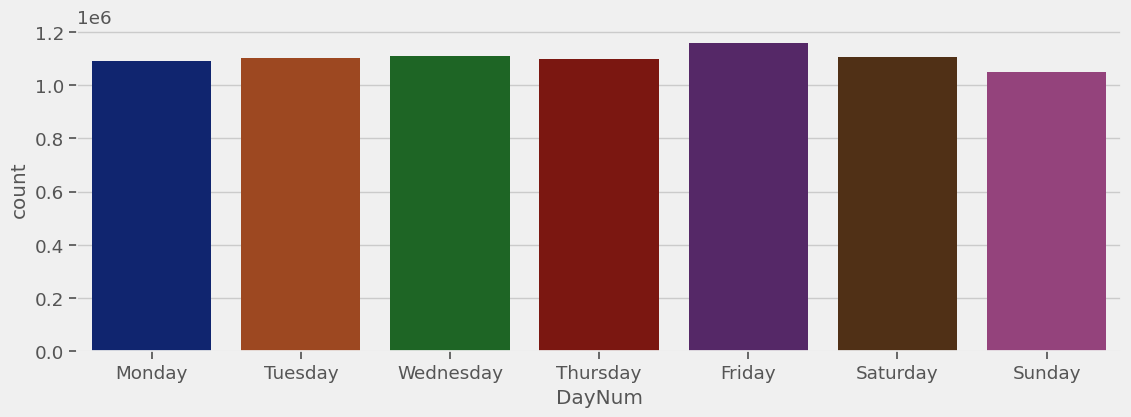

In [68]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')
ax.set_xticklabels([v for k,v in day_lookup.items()]);

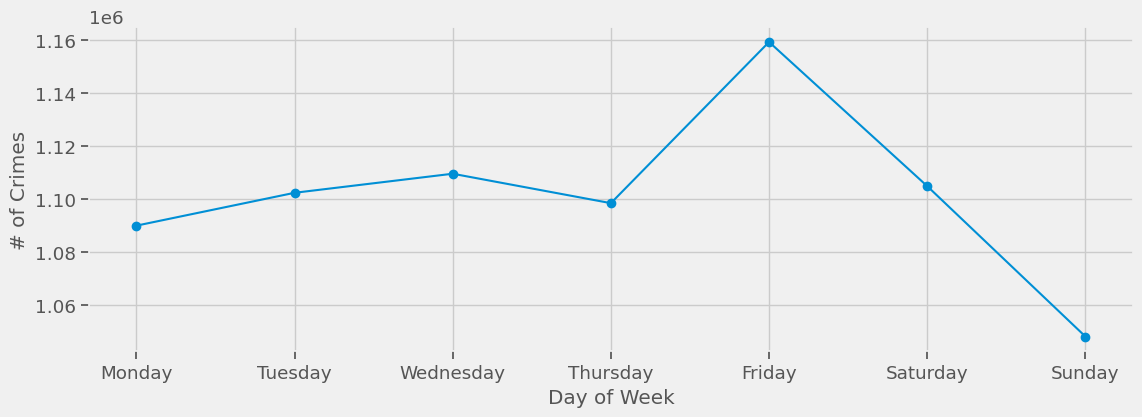

In [69]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

## 4) Weekends

/tmp/ipython-input-474510420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend',palette='dark');


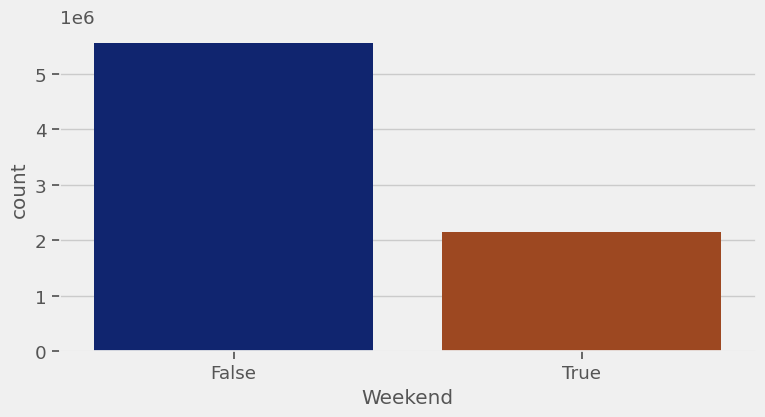

In [70]:
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

In [71]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

/tmp/ipython-input-484230828.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1111999.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weekend_counts.loc[False] /= 5


,count
Weekend,
False,1111999.4
True,1076556.0


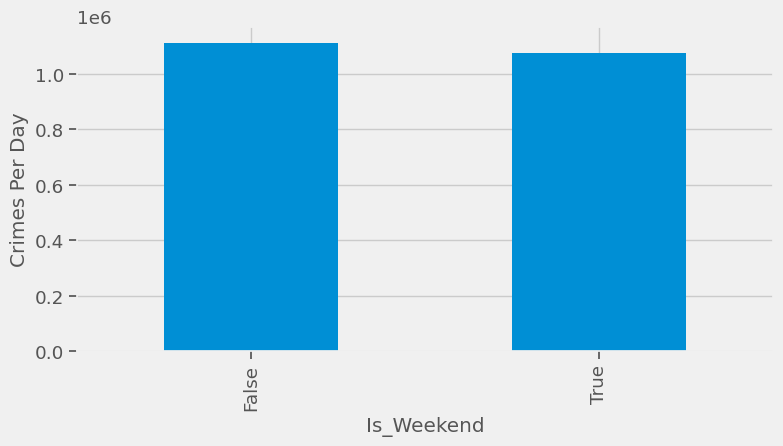

In [72]:
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');


## By hour

/tmp/ipython-input-19206046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HourOfDay',palette='dark');


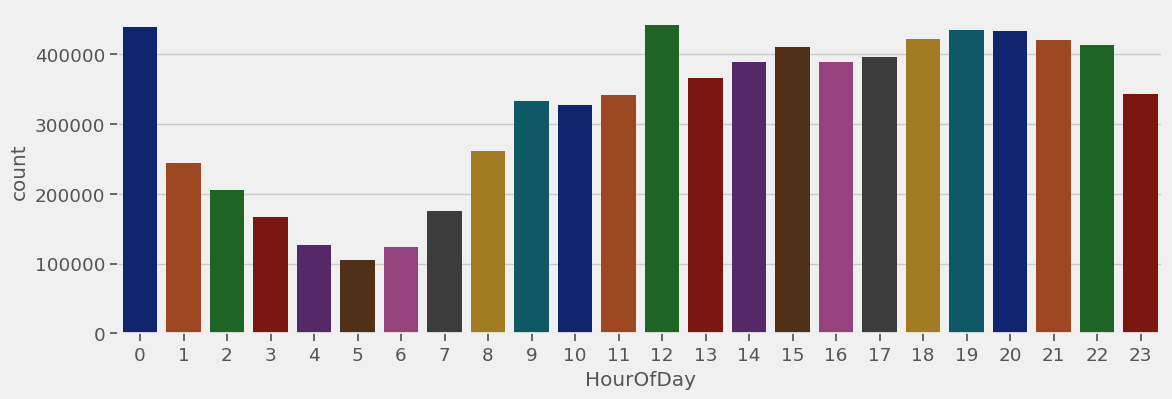

In [73]:
# adding hour of the day (12am=0)
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay',palette='dark');

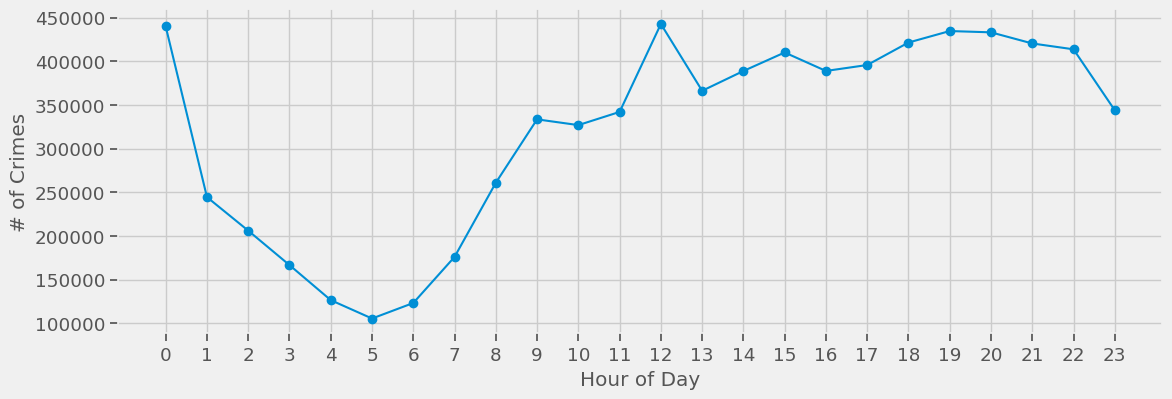

In [75]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()

ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);

#